In [6]:
import pandas as pd
import numpy as np

# Replace 'your_dataset.csv' with the actual path to your CSV file
df = pd.read_csv('SP500_close_price_no_missing.csv')

# Convert the 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Sort the DataFrame by date if it's not already sorted
df = df.sort_values(by='date')

# Calculate log returns
df['Log_Return'] = df['ACE'].pct_change().apply(lambda x: np.log(1 + x))

# Drop the first row as it will have NaN for log return
df = df.dropna()

# Display the DataFrame with log returns
print(df[['date', 'Log_Return']])


           date  Log_Return
1    2011-01-04   -0.000643
2    2011-01-05   -0.003382
3    2011-01-06   -0.004365
4    2011-01-07   -0.007481
5    2011-01-10   -0.013145
...         ...         ...
1038 2014-12-25    0.000000
1039 2014-12-26    0.001550
1040 2014-12-29    0.002235
1041 2014-12-30   -0.001719
1042 2014-12-31   -0.012027

[1042 rows x 2 columns]


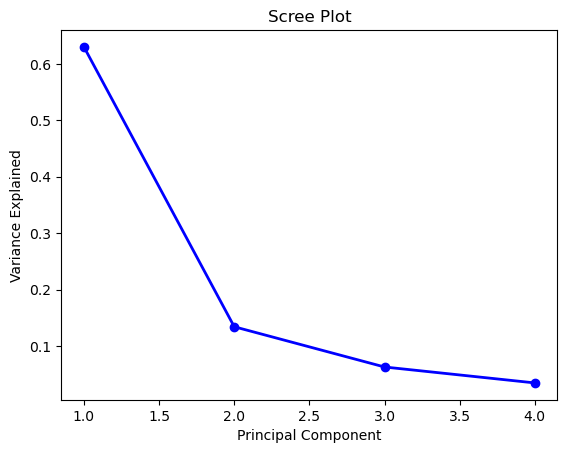

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

#define URL where dataset is located
dataset = 'SP500_close_price_no_missing.csv'

#read in data
data = pd.read_csv(dataset)

#define columns to use for PCA
df = data.iloc[:, 1:]

#define scaler
scaler = StandardScaler()

#create copy of DataFrame
scaled_df=df.copy()

#created scaled version of DataFrame
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

#define PCA model to use
pca = PCA(n_components=4)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

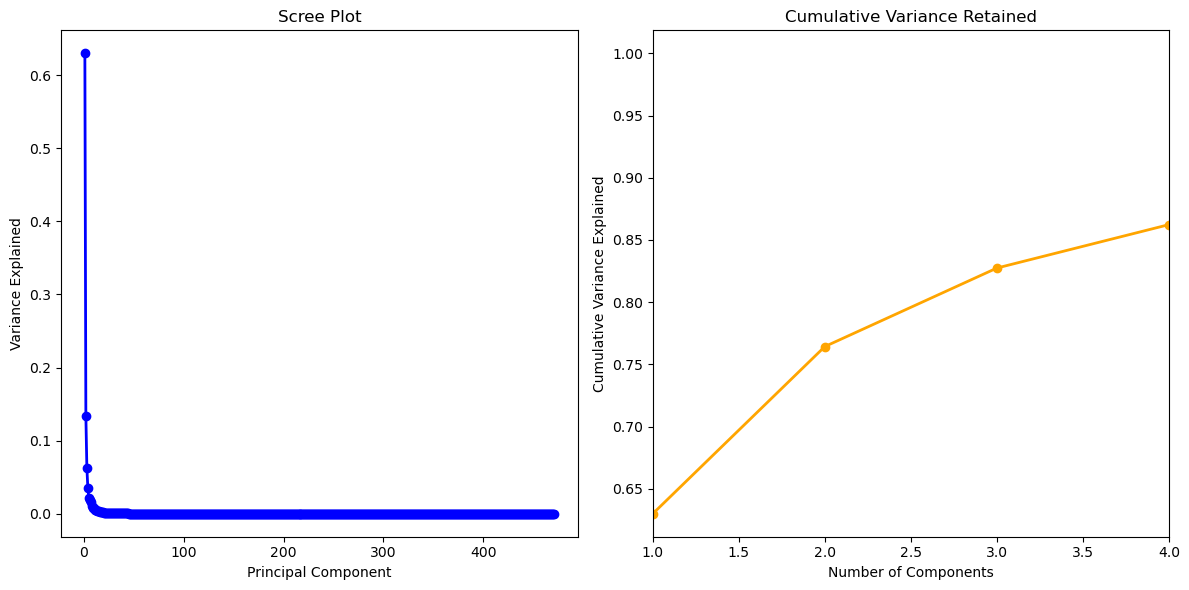

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Define URL where dataset is located
dataset = 'SP500_close_price_no_missing.csv'

# Read in data
data = pd.read_csv(dataset)

# Select all columns for PCA
df = data.iloc[:, 1:]

# Define scaler
scaler = StandardScaler()

# Create a copy of DataFrame
scaled_df = df.copy()

# Create scaled version of DataFrame
scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

# Define PCA model to use
pca = PCA()

# Fit PCA model to data
pca_fit = pca.fit(scaled_df)

# Plot the Scree Plot
PC_values = np.arange(1, pca.n_components_ + 1)
plt.figure(figsize=(12, 6))

# Plot 1: Scree Plot
plt.subplot(1, 2, 1)
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

# Plot 2: Cumulative Variance Retained
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.subplot(1, 2, 2)
plt.plot(PC_values, cumulative_variance_ratio, 'o-', linewidth=2, color='orange')
plt.title('Cumulative Variance Retained')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.xlim(1, 4)  # Set x-axis limit to zoom in on the range 1 to 100

plt.tight_layout()
plt.show()


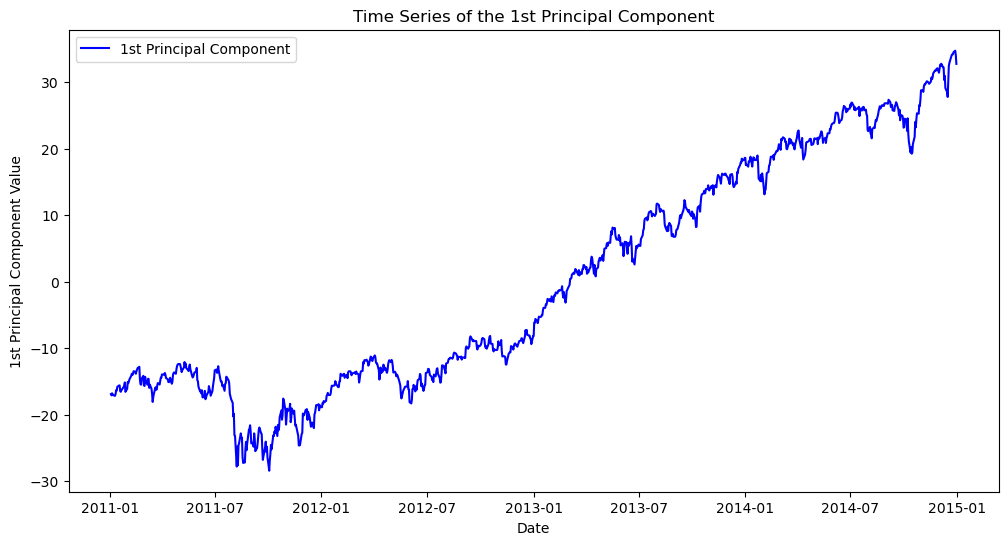

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define URL where dataset is located
dataset = 'SP500_close_price_no_missing.csv'

# Read in data
data = pd.read_csv(dataset)

# Select numerical columns for PCA
numerical_cols = data.columns[1:]

# Create a DataFrame with only numerical columns
df_numerical = data[numerical_cols]

# Define scaler
scaler = StandardScaler()

# Standardize the numerical columns
scaled_data = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_cols)

# Define PCA model to use
pca = PCA()

# Fit PCA model to standardized data
pca_fit = pca.fit(scaled_data)

# Transform the data to obtain principal components
principal_components = pca_fit.transform(scaled_data)

# Extract the 1st principal component
pc1 = principal_components[:, 0]

# Create a DataFrame with 'Date' and the 1st principal component
pc1_df = pd.DataFrame({'date': pd.to_datetime(data['date']), 'PC1': pc1})

# Set 'Date' as the index
pc1_df.set_index('date', inplace=True)

# Plot the time series of the 1st principal component
plt.figure(figsize=(12, 6))
plt.plot(pc1_df.index, pc1_df['PC1'], label='1st Principal Component', color='blue')
plt.title('Time Series of the 1st Principal Component')
plt.xlabel('Date')
plt.ylabel('1st Principal Component Value')
plt.legend()
plt.show()


In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define URL where dataset is located
dataset = 'SP500_close_price_no_missing.csv'

# Read in data
data = pd.read_csv(dataset)

# Select numerical columns for PCA
numerical_cols = data.columns[1:]

# Create a DataFrame with only numerical columns
df_numerical = data[numerical_cols]

# Define scaler
scaler = StandardScaler()

# Standardize the numerical columns
scaled_data = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_cols)

# Define PCA model to use
pca = PCA()

# Fit PCA model to standardized data
pca_fit = pca.fit(scaled_data)

# Get the weights (loadings) of the features in the 1st and 2nd principal components
weights_pc1 = pca_fit.components_[0]
weights_pc2 = pca_fit.components_[1]

# Create DataFrames to display the weights
weights_df_pc1 = pd.DataFrame({'Feature': numerical_cols, 'Weight_PC1': weights_pc1})
weights_df_pc2 = pd.DataFrame({'Feature': numerical_cols, 'Weight_PC2': weights_pc2})

# Display the weights
print("Weights for the 1st Principal Component:")
print(weights_df_pc1)

print("\nWeights for the 2nd Principal Component:")
print(weights_df_pc2)


Weights for the 1st Principal Component:
    Feature  Weight_PC1
0       MMM    0.057226
1       ACE    0.056674
2       ABT   -0.036799
3       ANF   -0.034121
4      ADBE    0.056986
..      ...         ...
466      XL    0.055214
467    YHOO    0.055817
468     YUM    0.045500
469     ZMH    0.057240
470    ZION    0.051737

[471 rows x 2 columns]

Weights for the 2nd Principal Component:
    Feature  Weight_PC2
0       MMM    0.013190
1       ACE   -0.021486
2       ABT   -0.018821
3       ANF    0.059619
4      ADBE    0.013113
..      ...         ...
466      XL   -0.005718
467    YHOO    0.007078
468     YUM   -0.055556
469     ZMH    0.005974
470    ZION    0.024888

[471 rows x 2 columns]


In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the ticker dataset
ticker_data = pd.read_csv('SP500_ticker.csv')

# Extract numerical columns for PCA
numerical_cols = ticker_data.select_dtypes(include=['float64', 'int64']).columns

# Create a DataFrame with only numerical columns
df_numerical = ticker_data[numerical_cols]

# Standardize the numerical columns
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(df_numerical), columns=numerical_cols)

# Define PCA model
pca = PCA()

# Fit PCA model to standardized data
pca_fit = pca.fit(scaled_data)

# Get the weights (loadings) of the features in the 1st principal component
weights_pc1 = pca_fit.components_[0]

# Create a DataFrame with weights and industry sector information
weights_df = pd.DataFrame({'Feature': numerical_cols, 'Weight_PC1': weights_pc1})
weights_df['IndustrySector'] = ticker_data['sector']

# Group the DataFrame by industry sector and calculate the mean weight for each sector
mean_weights_by_sector = weights_df.groupby('IndustrySector')['Weight_PC1'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(12, 6))
plt.bar(mean_weights_by_sector['IndustrySector'], mean_weights_by_sector['Weight_PC1'], color='blue')
plt.title('Mean Weight of 1st Principal Component by Industry Sector')
plt.xlabel('Industry Sector')
plt.ylabel('Mean Weight of 1st Principal Component')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.tight_layout()
plt.show()


ValueError: at least one array or dtype is required

In [69]:
# Assuming you have a DataFrame named 'scaled_df' with log returns
log_returns_nodate = scaled_df.copy()

weights_first_component = pca.components_[0, :]

ticker = pd.read_csv('SP500_ticker.csv')

weights_df = pd.DataFrame({'ticker': log_returns_nodate.columns, 'Weight': weights_first_component})

merged_df = pd.merge(weights_df, ticker, on='ticker')

mean_weights_by_sector = merged_df.groupby('sector')['Weight'].mean().reset_index()

# Plot the bar plot
plt.figure(figsize=(25, 6))
plt.bar(mean_weights_by_sector['sector'], mean_weights_by_sector['Weight'], color='blue')
plt.title('Mean Weight of First Principal Component by Sector')
plt.xlabel('Sector')
plt.ylabel('Mean Weight')
plt.show()


NameError: name 'scaled_df' is not defined

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

df=pd.read_csv('BMI.csv')


#Feature selection should be done after data preprocessing.
#Ideally  all the categorical variables should be encoded into numbers, so that we can assess how deterministic they are for target.
#Currently I will be dealling with numerical columns only.
colType = ['int64','float64']
#Select the columns which are either int64 or float64.
numCols=list(df.select_dtypes(include=colType).columns)
#Assigning numerical columns from df to data variable. We can use the same variable as well.
data=df[numCols]

#Lets check the shape.
data.shape

#Lets split the data in training set and test set.
X_train,X_test,y_train,y_test=train_test_split(data.drop('fatpctg',axis=1),data['fatpctg'],test_size=.2,random_state=1)

X_train.shape,X_test.shape
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names
col=correlation(X_train,0.8)
print('Correlated columns:',col) 

Correlated columns: {'Thigh', 'Knee', 'Neck', 'Chest', 'Hip', 'Abdomen'}


In [18]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#I am going to use RandomForestRegressor algoritham as an estimator. Your can select other regression alogritham as well.
from sklearn.ensemble import RandomForestRegressor
#k_features=10 (It will get top 10 features best suited for prediction)
#forward=True (Forward feature selection model)
#verbose=2 (It will show details output as shown below.)
#cv=5 (Kfold cross valiation: it will split the training set in 5 set and 4 will be using for training the model and 1 will using as validation)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
model=sfs(RandomForestRegressor(),k_features=10,forward=True,verbose=2,cv=5,n_jobs=-1,scoring='r2')
model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    8.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    8.5s finished

[2023-11-27 21:24:47] Features: 1/10 -- score: 0.5086606096832545[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.2s finished

[2023-11-27 21:24:50] Features: 2/10 -- score: 0.6383311112382645[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    3.4s finished

[2023-11-27 21:24:53] Features: 3/10 -- score: 0.6664858320232209[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.0s finished

[2023-11-27 21:25:00] Features: 4/10 -- score: 0.68

SequentialFeatureSelector(estimator=RandomForestRegressor(),
                          k_features=(10, 10), n_jobs=-1, scoring='r2',
                          verbose=2)

In [21]:
#Forward Feature Selection
#Get the selected feature index.
model.k_feature_idx_

#Get the column name for the selected feature.
model.k_feature_names_

('Age',
 'Weight',
 'Neck',
 'Chest',
 'Abdomen',
 'Hip',
 'Knee',
 'Ankle',
 'Biceps',
 'Wrist')

In [22]:
#Backward feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor
#k_features=10 (It will get top 10 features best suited for prediction)
#forward=False (Backward feature selection model)
#verbose=2 (It will show details output as shown below.)
#cv=5 (Kfold cross valiation: it will split the training set in 5 set and 4 will be using for training the model and 1 will using as validation)
#n_jobs=-1 (Number of cores it will use for execution.-1 means it will use all the cores of CPU for execution.)
#scoring='r2'(R-squared is a statistical measure of how close the data are to the fitted regression line)
backwardModel=sfs(RandomForestRegressor(),k_features=10,forward=False,verbose=2,cv=5,n_jobs=-1,scoring='r2')
#We will convert our training data into numpy array. If we will not convert it, model is not able to read some of the column names. 
backwardModel.fit(np.array(X_train),y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    6.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    6.2s finished

[2023-11-27 21:28:38] Features: 12/10 -- score: 0.693839892882159[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    4.6s finished

[2023-11-27 21:28:43] Features: 11/10 -- score: 0.6912321790186121[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   11.2s finished

[2023-11-27 21:28:54] Features: 10/10 -- score: 0.6931153652035833

SequentialFeatureSelector(estimator=RandomForestRegressor(), forward=False,
                          k_features=(10, 10), n_jobs=-1, scoring='r2',
                          verbose=2)

In [24]:
#Get the selected feature index.
backwardModel.k_feature_idx_

#Get the column name for the selected feature.
X_train.columns[list(backwardModel.k_feature_idx_)]

Index(['Age', 'Weight', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee',
       'Ankle', 'Wrist'],
      dtype='object')

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the BMI dataset
df = pd.read_csv('BMI.csv')

# Assume the target variable is 'fatpctg' and the rest are features
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform filter method feature selection based on correlation
def filter_feature_selection(X_train, X_test, y_train, y_test, threshold=0.1):
    # Calculate correlation with the target variable
    correlations = X_train.corrwith(y_train)

    # Select features with correlation above the threshold
    selected_features = correlations[abs(correlations) > threshold].index.tolist()

    # Print selected features and their correlation scores
    print("\nSelected Features and Correlation Scores:")
    for feature in selected_features:
        print(f"{feature}: {correlations[feature]}")

    return selected_features

# Perform filter method feature selection based on correlation
selected_features = filter_feature_selection(X_train, X_test, y_train, y_test, threshold=0.1)

# Train a linear regression model with the selected features
model = LinearRegression()
model.fit(X_train[selected_features], y_train)

# Make predictions on the test set
y_pred = model.predict(X_test[selected_features])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on Test Set: {mse}")



Selected Features and Correlation Scores:
Age: 0.29992609270695453
Weight: 0.6171216831624792
Height: 0.10681968210741877
Neck: 0.48347435815602646
Chest: 0.7102627055050114
Abdomen: 0.823492708426581
Hip: 0.6318519749243215
Thigh: 0.5422446464105817
Knee: 0.49780614135026924
Ankle: 0.2268923389571129
Biceps: 0.47175223945876915
Forearm: 0.3456791739915236
Wrist: 0.3236895674951684

Mean Squared Error on Test Set: 19.551365613094585


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the BMI dataset
df = pd.read_csv('BMI.csv')

# Assume the target variable is 'fatpctg' and the rest are features
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform feature selection using Random Forest feature importance
def random_forest_feature_selection(X_train, X_test, y_train, n_estimators=100):
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Get feature importances
    feature_importances = model.feature_importances_

    # Create a DataFrame to display feature importances
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

    # Sort features by importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Print feature importances
    print("\nFeature Importances:")
    print(feature_importance_df)

    # Select top features based on importance
    selected_features = feature_importance_df['Feature'].tolist()[:10]  # Adjust the number of top features as needed

    # Print selected features
    print("\nSelected Features:")
    print(selected_features)

    return selected_features

# Perform feature selection using Random Forest
selected_features = random_forest_feature_selection(X_train, X_test, y_train)

# Train a linear regression model with the selected features
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train[selected_features], y_train)

# Make predictions on the test set
y_pred = model.predict(X_test[selected_features])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on Test Set: {mse}")



Feature Importances:
    Feature  Importance
5   Abdomen    0.714957
1    Weight    0.031164
12    Wrist    0.030504
2    Height    0.029040
6       Hip    0.028463
3      Neck    0.026902
4     Chest    0.024049
0       Age    0.023840
9     Ankle    0.019951
10   Biceps    0.019619
8      Knee    0.019410
11  Forearm    0.016606
7     Thigh    0.015493

Selected Features:
['Abdomen', 'Weight', 'Wrist', 'Height', 'Hip', 'Neck', 'Chest', 'Age', 'Ankle', 'Biceps']

Mean Squared Error on Test Set: 17.760674196078433


In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

# Load the BMI dataset
df = pd.read_csv('BMI.csv')

# Assume the target variable is 'fatpctg' and the rest are features
X = df.drop('fatpctg', axis=1)
y = df['fatpctg']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to perform embedded Lasso regression for feature selection
def lasso_feature_selection(X_train, X_test, y_train, y_test, alphas=None):
    if alphas is None:
        alphas = [0.001, 0.01, 0.1, 1.0, 10.0]  # Adjust as needed

    model = LassoCV(alphas=alphas, cv=5, max_iter=100000)
    model.fit(X_train, y_train)

    # Get selected features (those with non-zero coefficients)
    selected_features = X_train.columns[model.coef_ != 0]

    # Get feature importance scores based on absolute coefficients
    feature_importances = abs(model.coef_)

    # Create a DataFrame to display feature importances
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

    # Sort features by importance in descending order
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Print selected features and their importance scores
    print("\nSelected Features and Importance Scores:")
    for feature in selected_features:
        importance_score = feature_importance_df.loc[feature_importance_df['Feature'] == feature, 'Importance'].iloc[0]
        print(f"{feature}: {importance_score}")

    return selected_features

# Perform Lasso regression for feature selection
selected_features = lasso_feature_selection(X_train, X_test, y_train, y_test)

# Train a linear regression model with the selected features
model = LassoCV(alphas=[model.alpha_], cv=5, max_iter=100000)  # Use the same alpha for training the final model
model.fit(X_train[selected_features], y_train)

# Make predictions on the test set
y_pred = model.predict(X_test[selected_features])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error on Test Set: {mse}")



Selected Features and Importance Scores:
Age: 0.056398833759141606
Weight: 0.0643794405710501
Height: 0.06445829643309813
Neck: 0.39320396185019835
Chest: 0.05942594550895662
Abdomen: 0.9650800693154562
Hip: 0.09335592039484132
Thigh: 0.14536177524040933
Ankle: 0.05333792284129469
Biceps: 0.2786700850611043
Forearm: 0.17043942035737222
Wrist: 1.7838231158467777


AttributeError: 'RandomForestRegressor' object has no attribute 'alpha_'